In [32]:
# Importando bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Instânciando o caminho dos dados.
dados = "/content/drive/MyDrive/Code/Myrep/Churn_Clientes/Datasets/db_final.csv"

#Criando o Dataframe
df_final = pd.read_csv(dados)

Como os modelos que serão usados são modelos de classificação, é necessário normalizar a escala dos dados, uma vez que modelos, como o k-vizinho, são sensíveis a escalas.

In [63]:
# Preparando os dados para aplicação dos modelos.
X = df_final.drop('Churn', axis= 1) # Removi apenas a coluna Churn

y = df_final['Churn'] # Declarei a coluna Churn como variável dependente.

# Criando uma instância normalizadora em função da média e desveio padraão.
norma = StandardScaler()

# Criando o X normalizado, aplicando a função fit.
X_normalizado = norma.fit_transform(X)
X_normalizado[0]

array([ 1.21352395, -0.54384519, -3.04901909, -0.51691923,  1.57056253,
       -0.64181401, -0.52995433, -0.77260183, -0.77595463,  0.76925621,
       -0.43664288, -1.11061427, -0.92115   ,  3.14890645, -0.85770576,
        1.53970258, -1.03341456, -0.441809  , -0.44975239,  0.7296273 ,
       -0.43523015, -0.44321428,  1.2257811 , -0.49492127, -0.45888514])

In [64]:
X

,Conjuge,Dependentes,TelefoneFixo,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,PagamentoOnline,...,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
10344,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
10345,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
10346,0,1,1,0,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [48]:
# Alocando os dados em treino e teste, foi definido uma proporção padrão de 30%  para 70%.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado,y, test_size= 0.3, random_state= 9191)

In [49]:
# Instânciando o algoritimo padrão de knn, definindo a métrica como Eucldiana.
knn = KNeighborsClassifier(metric= 'euclidean')

# Treinando o modelo.
knn.fit(X_treino,y_treino)

# Criando um modelo de previsão com base no knn.
previsao_knn = knn.predict(X_teste)
previsao_knn

array([0, 1, 1, ..., 1, 0, 1])

In [50]:
# Instânciando o algoritimo padrão de Brnoulli-Naives-Bayes, definindo a binárização em função da media do X_Treino de 0.0017.
bnb = BernoulliNB() # Pois o resultado do Churn é binário.

# Treinando o modelo.
bnb.fit(X_treino,y_treino)

# Realizando a previsão do modelo de Bernoulli
previsao_bnb = bnb.predict(X_teste)
previsao_bnb

array([0, 1, 1, ..., 1, 1, 1])

In [51]:
# Instânciando o algoritimo padrão de árvore de decisão, definindo a entropia como critério de escolha.
dtc= DecisionTreeClassifier(criterion= 'entropy', random_state= 9191)

# Treinando o modelo.
dtc.fit(X_treino,y_treino)

# Realizando a previsão com base em árvore de decisão.
previsao_dtc = dtc.predict(X_teste)
previsao_dtc

array([0, 1, 1, ..., 1, 1, 0])

In [52]:
# Matriz de confusão para o modelo knn.
print('Matriz de confusão e Acurácia para o modelo knn.')
print(confusion_matrix(y_teste, previsao_knn))
print(f'Acurácia: {accuracy_score(y_teste, previsao_knn) * 100:.2f}%')
print(f'Precisão: {precision_score(y_teste, previsao_knn) * 100:.2f}%')
print(f'Recall: {recall_score(y_teste, previsao_knn) * 100:.2f}%')
print()

# Matriz de confusão para o modelo bnb.
print('Matriz de confusão e Acurácia para o modelo bnb.')
print(confusion_matrix(y_teste, previsao_bnb))
print(f'Acurácia: {accuracy_score(y_teste, previsao_bnb) * 100:.2f}%')
print(f'Precisão: {precision_score(y_teste, previsao_bnb) * 100:.2f}%')
print(f'Recall: {recall_score(y_teste, previsao_bnb) * 100:.2f}%')
print()

# Matriz de confusão para o modelo dtc.
print('Matriz de confusão e Acurácia para o modelo dtc.')
print(confusion_matrix(y_teste, previsao_dtc))
print(f'Acurácia: {accuracy_score(y_teste, previsao_dtc) * 100:.2f}%')
print(f'Precisão: {precision_score(y_teste, previsao_dtc) * 100:.2f}%')
print(f'Recallrecall_score: {recall_score(y_teste, previsao_dtc) * 100:.2f}%')
print()

Matriz de confusão e Acurácia para o modelo knn.
[[1165  368]
 [ 207 1365]]
Acurácia: 81.48%
Precisão: 78.77%
Recall: 86.83%

Matriz de confusão e Acurácia para o modelo bnb.
[[1088  445]
 [ 258 1314]]
Acurácia: 77.36%
Precisão: 74.70%
Recall: 83.59%

Matriz de confusão e Acurácia para o modelo dtc.
[[1187  346]
 [ 271 1301]]
Acurácia: 80.13%
Precisão: 78.99%
Recallrecall_score: 82.76%



In [53]:
# Suponha que você já tenha as previsões (previsao_knn, previsao_bnb, previsao_dtc) e os rótulos verdadeiros (y_teste).

# Calcular o F1-score para o modelo KNN
f1_knn = f1_score(y_teste, previsao_knn)

# Calcular o F1-score para o modelo BernoulliNB
f1_bnb = f1_score(y_teste, previsao_bnb)

# Calcular o F1-score para o modelo Decision Tree
f1_dtc = f1_score(y_teste, previsao_dtc)

print(f'F1-score para o modelo KNN: {f1_knn:.2f}')
print(f'F1-score para o modelo BernoulliNB: {f1_bnb:.2f}')
print(f'F1-score para o modelo Decision Tree: {f1_dtc:.2f}')


F1-score para o modelo KNN: 0.83
F1-score para o modelo BernoulliNB: 0.79
F1-score para o modelo Decision Tree: 0.81


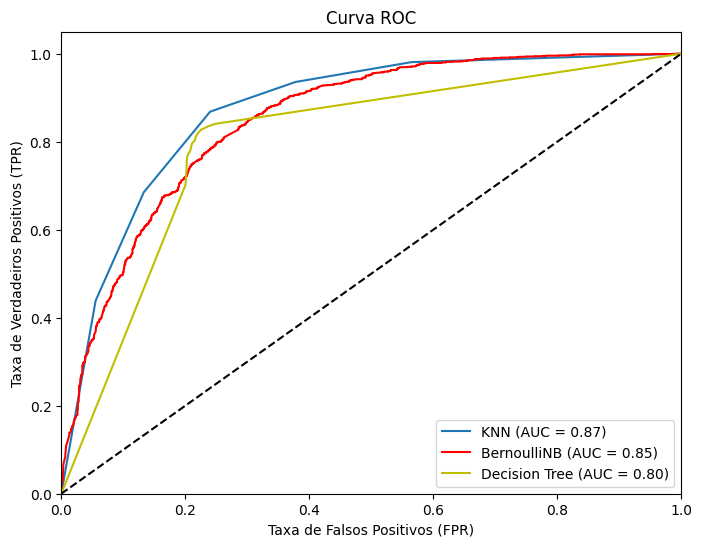

In [54]:
# Suponha que você tem os modelos já treinados: modelo_knn, modelo_bnb e modelo_dtc

# Obtendo as probabilidades de previsão para a classe positiva (1)
probas_knn = knn.predict_proba(X_teste)[:, 1]
probas_bnb = bnb.predict_proba(X_teste)[:, 1]
probas_dtc = dtc.predict_proba(X_teste)[:, 1]

# Calculando as taxas de verdadeiros positivos (TPR) e taxas de falsos positivos (FPR) para cada modelo
fpr_knn, tpr_knn, _ = roc_curve(y_teste, probas_knn)
fpr_bnb, tpr_bnb, _ = roc_curve(y_teste, probas_bnb)
fpr_dtc, tpr_dtc, _ = roc_curve(y_teste, probas_dtc)

# Calculando a área sob a curva ROC (AUC)
auc_knn = roc_auc_score(y_teste, probas_knn)
auc_bnb = roc_auc_score(y_teste, probas_bnb)
auc_dtc = roc_auc_score(y_teste, probas_dtc)

# Plotando a curva ROC para cada modelo
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_bnb, tpr_bnb, color = 'red', label=f'BernoulliNB (AUC = {auc_bnb:.2f})')
plt.plot(fpr_dtc, tpr_dtc, color = 'y', label=f'Decision Tree (AUC = {auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Considerando as métricas envolvidas na análise dos modelos:
+ A acurácia mede a proporção de previsões corretas em relação a todas as previsões.  
+ A precisão mede a proporção de previsões positivas corretas em relação a todas as previsões positivas.  
+ O recall mede a proporção de previsões positivas corretas em relação a todas as instâncias positivas no conjunto de dados.  
+ O F1-score fornece uma única métrica que combina precisão e recall, ajudando a avaliar o equilíbrio entre essas duas métricas.  
+ Quanto maior a AUC, melhor o desempenho do modelo em separar as classes positiva e negativa. Um valor de AUC de 0,5 indica que o modelo é equivalente a um classificador aleatório, enquanto um valor de AUC de 1,0 indica um classificador perfeito que é capaz de fazer todas as previsões corretas.  

Fica evidente que o melhor modelo a ser utilizado é o **KNN.**  
Para testar sua capacidade de operação, vamos criar 2 vetores de características que correspondem a 2 clientes hipotéticos. Para garantir que os vetores sejam os mais próximos possíveis de um cliente real, todo o processo foi randomizado e usada uma seed para reprodução.

In [55]:
# Crie um array 1x26 preenchido com 'b' representando as 26 features.
array = np.full((1, 26), 'b')

# Altere o décimo segundo  e o décimo terceiro elemento para 'i', pois correspondem aos valores float do dataframe.
array[0, 11:13] = 'i'

print(array)

[['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'i' 'i' 'b' 'b' 'b' 'b' 'b'
  'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b']]


In [100]:
# Define a semente (seed) como 9191 para o numpy.random
np.random.seed(9191)

# Array original com 'b' e 'i'
original_array = np.array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'i', 'i', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b','b', 'b'])

# Crie um novo array para armazenar os valores booleanos e inteiros
new_array = np.zeros(25, dtype=object)

# Mapeie 'b' para valores booleanos 0 ou 1
new_array[original_array == 'b'] = np.random.choice([0, 1], sum(original_array == 'b'))

# Mapeie 'i' para valores inteiros entre 0 e 120
new_array[original_array == 'i'] = np.random.randint(0, 121, sum(original_array == 'i'))

# Converta o novo array em um array numpy
X_Marcos = [np.array(new_array)]

# Normalizando o vetor caracteristico de teste.
X_Marcos_normalizado = norma.transform(pd.DataFrame(X_Marcos, columns= X.columns))

# Faz a previsão com o modelo KNN treinado
previsao_marcos = knn.predict(X_Marcos_normalizado)

# A variável 'previsao_marcos' agora conterá a previsão para o novo cliente fictício (0 para não churn, 1 para churn).
print(f'Previsão para o novo cliente Marcos: {previsao_marcos[0]}')

print()

# Define a semente (seed) como 3 para o numpy.random
np.random.seed(6)

# Array original com 'b' e 'i'
original_array = np.array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'i', 'i', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'])

# Crie um novo array para armazenar os valores booleanos e inteiros
new_array = np.zeros(25, dtype=object)

# Mapeie 'b' para valores booleanos 0 ou 1
new_array[original_array == 'b'] = np.random.choice([0, 1], sum(original_array == 'b'))

# Mapeie 'i' para valores inteiros entre 0 e 120
new_array[original_array == 'i'] = np.random.randint(0, 121, sum(original_array == 'i'))

# Converta o novo array em um array numpy
X_Vanessa = [np.array(new_array)]

# Normalizando o vetor caracteristico de teste.
X_Vanessa_normalizado = norma.transform(pd.DataFrame(X_Vanessa, columns= X.columns))

# Faz a previsão com o modelo KNN treinado
previsao_vanessa = knn.predict(X_Vanessa_normalizado)

# A variável 'previsao_vanessa' agora conterá a previsão para o novo cliente fictício (0 para não churn, 1 para churn).
print(f'Previsão para o novo cliente Vanessa: {previsao_vanessa[0]}')


Previsão para o novo cliente Marcos: 0

Previsão para o novo cliente Vanessa: 1


O modelo, agora treinado, testado e em operação, pode ser apresentado à equipe responsável na empresa. Uma vez que previsões, como as da cliente Vanessa, nas quais obtemos Churn positivo (1), indicam que os clientes deixaram a empresa e, portanto, requerem maior atenção. O próximo passo seria investigar cada feature em busca das variáveis que levam à redução do churn previsto pelo modelo e identificar as possíveis características de clientes com maior adesão.

In [ ]:
# Salve o modelo em um arquivo
#joblib.dump(knn, 'modelo_knn.pkl')

In [ ]:
# Carregue o modelo a partir do arquivo
#modelo_carregado = joblib.load('modelo_knn.pkl')

#novo_cliente = {Dados do novo cliente}

# Pré-processamento dos dados do novo cliente (limpeza, transformação, normalização)
# Normalização dos dados do novo cliente usando o StandardScaler.
#novo_cliente_normalizado = norma.transform(pd.DataFrame(novo_cliente, columns=X.columns))

# Previsão de Churn do modelo.
#previsao_nome_do_cliente = modelo_carregado.predict(novo_cliente_normalizado)